In [1]:
import numpy as np

In [2]:
X = 60
Y = 110
fov = 60
s_overlap = 0.7
f_overlap = 0.75


def get_steps(h):
    # footprint
    W = 2 * h * np.tan(np.deg2rad(fov / 2))
    # nominal steps
    dx_nom = W * (1 - s_overlap)
    dy_nom = W * (1 - f_overlap)
    # provisional counts
    N = int(np.ceil((X - W) / dx_nom)) + 1
    M = int(np.ceil((Y - W) / dy_nom)) + 1
    return N, M


def get_step_size(h, N=None, M=None):
    # footprint
    W = 2 * h * np.tan(np.deg2rad(fov / 2))
    if N is None or M is None:
        N, M = get_steps(h)
    # provisional counts
    dx = (X - W) / (N - 1)
    dy = (Y - W) / (M - 1)
    return dx, dy

In [3]:
h = 20

for h in [10, 20, 30, 40, 50]:
    N, M = get_steps(h)
    W = 2 * h * np.tan(np.deg2rad(fov / 2))
    dx, dy = get_step_size(h)
    print(f"Height: {h} m")
    print(f"dx: {dx:.2f} m, dy: {dy:.2f} m")
    print(f"N: {N}, M: {M}")
    print(f"W: {W:.2f} m")
    coverage_area = ((N - 1) * dx + W) * ((M - 1) * dy + W)
    print(f"Coverage area: {coverage_area:.2f} m²")
    num_images = N * M
    print(f"Number of images: {num_images}")

Height: 10 m
dx: 3.46 m, dy: 2.81 m
N: 15, M: 36
W: 11.55 m
Coverage area: 6600.00 m²
Number of images: 540
Height: 20 m
dx: 6.15 m, dy: 5.43 m
N: 7, M: 17
W: 23.09 m
Coverage area: 6600.00 m²
Number of images: 119
Height: 30 m
dx: 8.45 m, dy: 8.37 m
N: 4, M: 10
W: 34.64 m
Coverage area: 6600.00 m²
Number of images: 40
Height: 40 m
dx: 13.81 m, dy: 10.64 m
N: 2, M: 7
W: 46.19 m
Coverage area: 6600.00 m²
Number of images: 14
Height: 50 m
dx: 2.26 m, dy: 13.07 m
N: 2, M: 5
W: 57.74 m
Coverage area: 6600.00 m²
Number of images: 10


In [4]:
# Check
X_final = (N - 1) * dx + W
Y_final = (M - 1) * dy + W
print(f"Final X: {X_final:.2f} m, Final Y: {Y_final:.2f} m")
print(f"Final coverage area: {X_final * Y_final:.2f} m²")
assert np.isclose(X_final, X, atol=1e-2), "Final X does not match expected value"
assert np.isclose(Y_final, Y, atol=1e-2), "Final Y does not match expected value"
assert np.isclose(
    coverage_area, X * Y, atol=1e-1
), "Coverage area does not match expected value"
assert num_images == N * M, "Number of images does not match expected value"

Final X: 60.00 m, Final Y: 110.00 m
Final coverage area: 6600.00 m²


In [5]:
fov = 60

M = 11 / 6 * N + 5 / 12
h = 120 / (2 * N + 1) * (0.5 / np.tan(np.deg2rad(fov / 2)))

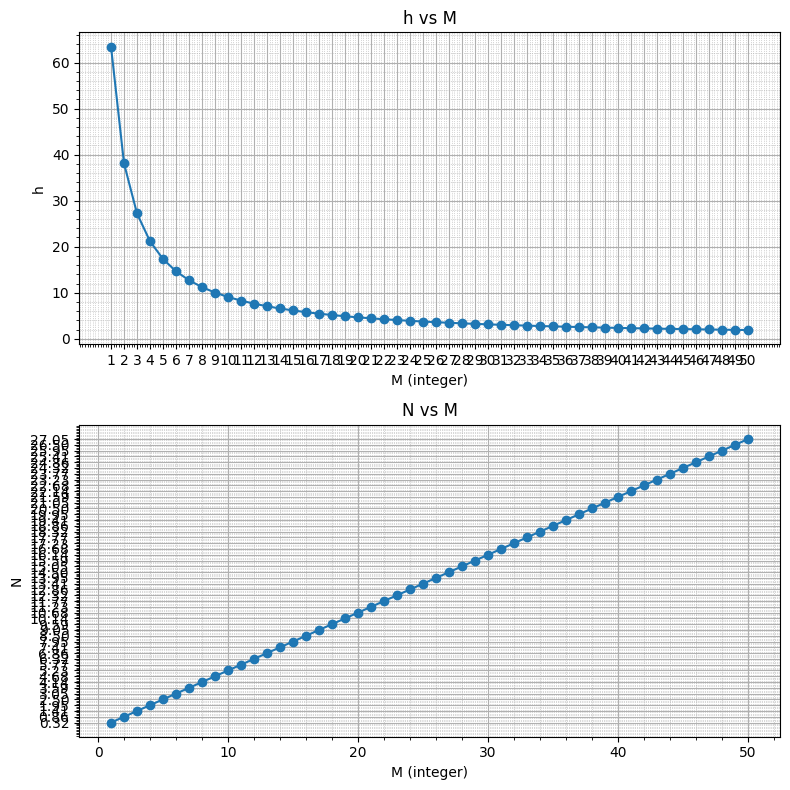

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fov = 60
M = np.arange(1, 51)  # M from 1 to 30 integers
N = 6 / 11 * M - 5 / 22
# N_values = np.arange(1, 31)  # N from 1 to 30 integers

# M = 11 / 6 * N_values + 5 / 12
h = 120 / (2 * N + 1) * (0.5 / np.tan(np.deg2rad(fov / 2)))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

ax1.plot(M, h, marker="o")
ax1.set_xlabel("M (integer)")
ax1.set_ylabel("h")
ax1.set_title("h vs M")

ax1.set_xticks(M)  # Set x ticks at every integer
# ax1.set_yticks(h)
ax1.grid(which="major", linestyle="-", linewidth=0.8)  # Major grid
ax1.minorticks_on()  # Turn on minor ticks
ax1.grid(which="minor", linestyle=":", linewidth=0.5)  # Minor grid


ax2.plot(M, N, marker="o")
ax2.set_xlabel("M (integer)")
ax2.set_ylabel("N")
ax2.set_title("N vs M")
# ax2.set_xticks(M)
ax2.set_yticks(N)
ax2.grid(which="major", linestyle="-", linewidth=0.8)
ax2.minorticks_on()
ax2.grid(which="minor", linestyle=":", linewidth=0.5)

plt.tight_layout()
plt.show()

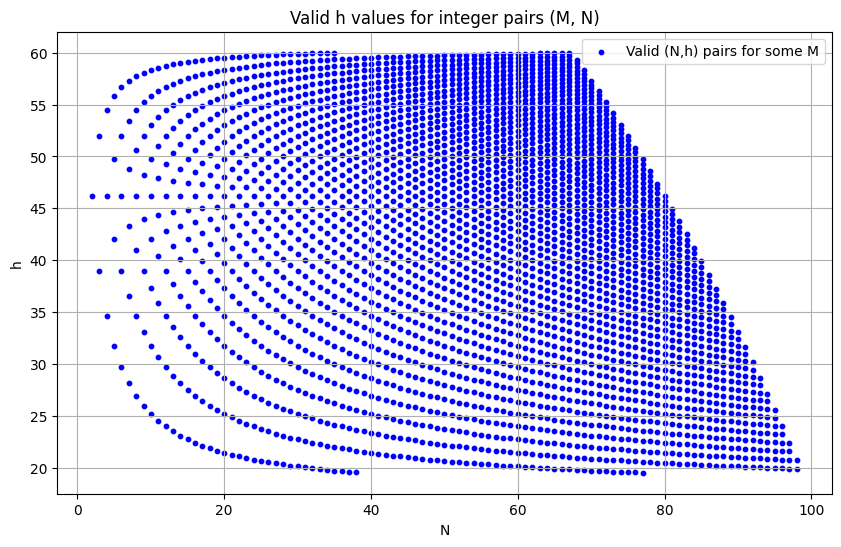

In [7]:
import numpy as np
import matplotlib.pyplot as plt

h_min, h_max = 19.5, 60
results = []

N_range = range(1, 101)
M_range = range(1, 201)

for N in N_range:
    for M in M_range:
        r = M / N
        if r <= 1:
            continue  # skip invalid r (division by zero or negative h)
        h = (120 - 100 / (r - 1)) / 1.1547
        if h_min <= h <= h_max:
            results.append((M, N, h))

# Convert to arrays for plotting
M_vals, N_vals, h_vals = zip(*results)

plt.figure(figsize=(10, 6))
plt.scatter(N_vals, h_vals, c="blue", s=10, label="Valid (N,h) pairs for some M")
plt.xlabel("N")
plt.ylabel("h")
plt.title("Valid h values for integer pairs (M, N)")
plt.grid(True)
plt.legend()
plt.show()

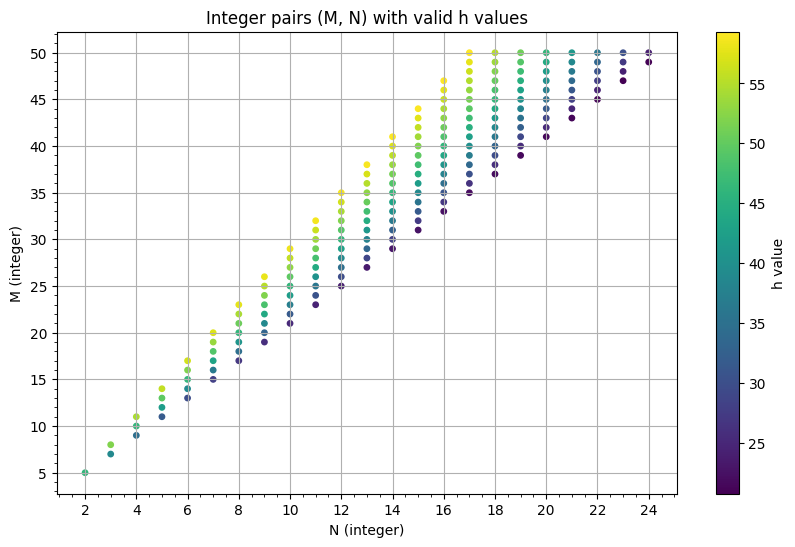

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

h_min, h_max = 19, 60
valid_points = []

M_range = range(1, 51)
N_range = range(1, 31)

for N in N_range:
    for M in M_range:
        r = M / N
        if r <= 1:
            continue  # avoid division by zero or negative h
        h = (120 - 100 / (r - 1)) / 1.1547
        if h_min <= h <= h_max:
            valid_points.append((N, M, h))

# Unpack
N_vals, M_vals, h_vals = zip(*valid_points)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(N_vals, M_vals, c=h_vals, cmap="viridis", s=15)
plt.colorbar(scatter, label="h value")
plt.xlabel("N (integer)")
plt.ylabel("M (integer)")
plt.title("Integer pairs (M, N) with valid h values")


# ax2.set_xticks(M)
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))
# ax.xaxis.set_minor_locator(MultipleLocator(3))
ax.yaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.minorticks_on()


plt.grid(True)
plt.show()

In [9]:
def find_M_h_for_N(N, M_min=1, M_max=200, h_min=19, h_max=60):
    results = []
    for M in range(M_min, M_max + 1):
        r = M / N
        if r <= 1:
            continue
        h = (120 - 100 / (r - 1)) / 1.1547
        if h_min <= h <= h_max:
            dx = (120 - 1.1547 * h) / (2 * N)
            results.append((M, h, dx))
    return results


# Example usage:
N = 20
pairs = find_M_h_for_N(N)
print(f"Valid (M, h, dx) triples for N={N}:")
for M, h, dx in pairs:
    print(f"M = {M}, h = {h:.3f}, dx = {dx:.4f}")

Valid (M, h, dx) triples for N=20:
M = 41, h = 21.444, dx = 2.3810
M = 42, h = 25.193, dx = 2.2727
M = 43, h = 28.617, dx = 2.1739
M = 44, h = 31.754, dx = 2.0833
M = 45, h = 34.641, dx = 2.0000
M = 46, h = 37.306, dx = 1.9231
M = 47, h = 39.773, dx = 1.8519
M = 48, h = 42.064, dx = 1.7857
M = 49, h = 44.197, dx = 1.7241
M = 50, h = 46.188, dx = 1.6667
M = 51, h = 48.050, dx = 1.6129
M = 52, h = 49.796, dx = 1.5625
M = 53, h = 51.437, dx = 1.5152
M = 54, h = 52.980, dx = 1.4706
M = 55, h = 54.436, dx = 1.4286
M = 56, h = 55.811, dx = 1.3889
M = 57, h = 57.111, dx = 1.3514
M = 58, h = 58.343, dx = 1.3158
M = 59, h = 59.512, dx = 1.2821


In [18]:
def find_pairs_for_dx(
    dx_target,
    N_min=1,
    N_max=100,
    M_min=1,
    M_max=200,
    h_min=19.5,
    h_max=65,
    tol=1e-3,
    origin=True,
):
    results = []
    for N in range(N_min, N_max + 1):
        for M in range(M_min, M_max + 1):
            r = M / N
            if r == 1:
                continue

            h = (120 - 100 / (r - 1)) / 1.1547
            dx = (120 - 1.1547 * h) / (2 * N)
            if origin is False:
                h = h / 2
                dx = (60 - 1.1547 * h) / N

            if not (h_min <= h <= h_max):
                continue

            if abs(dx - dx_target) < tol:
                results.append((N, M, h, dx))
    return results


# Example usage:
dx_target = 2.5

Pairs (N, M, h, dx) with dx close to 2.5 origin True:
N=9, M=29, h=64.952, dx=2.5000
N=10, M=30, h=60.622, dx=2.5000
N=11, M=31, h=56.292, dx=2.5000
N=12, M=32, h=51.962, dx=2.5000
N=13, M=33, h=47.631, dx=2.5000
N=14, M=34, h=43.301, dx=2.5000
N=15, M=35, h=38.971, dx=2.5000
N=16, M=36, h=34.641, dx=2.5000
N=17, M=37, h=30.311, dx=2.5000
N=18, M=38, h=25.981, dx=2.5000
N=19, M=39, h=21.651, dx=2.5000


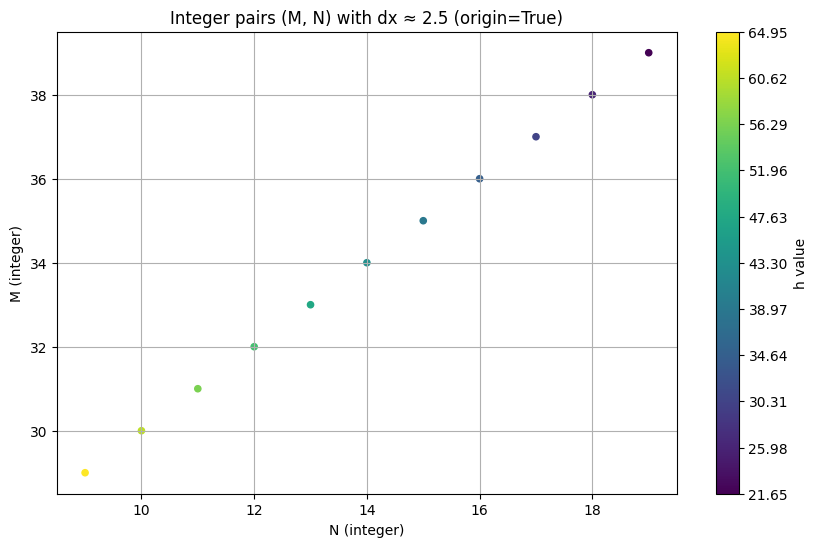

In [33]:
def print_pairs(dx, origin=True):
    tolerance = 1e-3
    N_min, N_max = 1, 100
    M_min, M_max = 1, 200
    h_min = 19.5
    h_max = 65
    # Find pairs
    valid_points = find_pairs_for_dx(
        dx_target,
        N_min,
        N_max,
        M_min,
        M_max,
        tol=tolerance,
        h_min=h_min,
        h_max=h_max,
        origin=origin,
    )

    if valid_points:

        print(f"Pairs (N, M, h, dx) with dx close to {dx_target} origin {origin}:")
        for N, M, h, dx in valid_points:
            print(f"N={N}, M={M}, h={h:.3f}, dx={dx:.4f}")
    else:
        print("No valid pairs found.")
    return valid_points


# Parameters
dx_target = 2.5
origin = True  # Set to False if you want to use the origin-centered grid

valid_points = print_pairs(dx_target, origin=origin)

N_vals, M_vals, h_vals, dx = zip(*valid_points)
h_unique = sorted(set(np.round(h_vals, 2)))  # unique rounded h values

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(N_vals, M_vals, c=h_vals, cmap="viridis", s=20)
cbar = plt.colorbar(scatter)
cbar.set_ticks(h_unique)
cbar.set_ticklabels([f"{v:.2f}" for v in h_unique])
cbar.set_label("h value")
plt.xlabel("N (integer)")
plt.ylabel("M (integer)")
plt.title(f"Integer pairs (M, N) with dx ≈ {dx_target} (origin={origin})")
plt.grid(True)

plt.show()

Pairs (N, M, h, dx) with dx close to 2.5 origin False:
N=1, M=21, h=49.796, dx=2.5000
N=2, M=22, h=47.631, dx=2.5000
N=3, M=23, h=45.466, dx=2.5000
N=4, M=24, h=43.301, dx=2.5000
N=5, M=25, h=41.136, dx=2.5000
N=6, M=26, h=38.971, dx=2.5000
N=7, M=27, h=36.806, dx=2.5000
N=8, M=28, h=34.641, dx=2.5000
N=9, M=29, h=32.476, dx=2.5000
N=10, M=30, h=30.311, dx=2.5000
N=11, M=31, h=28.146, dx=2.5000
N=12, M=32, h=25.981, dx=2.5000
N=13, M=33, h=23.816, dx=2.5000
N=14, M=34, h=21.651, dx=2.5000


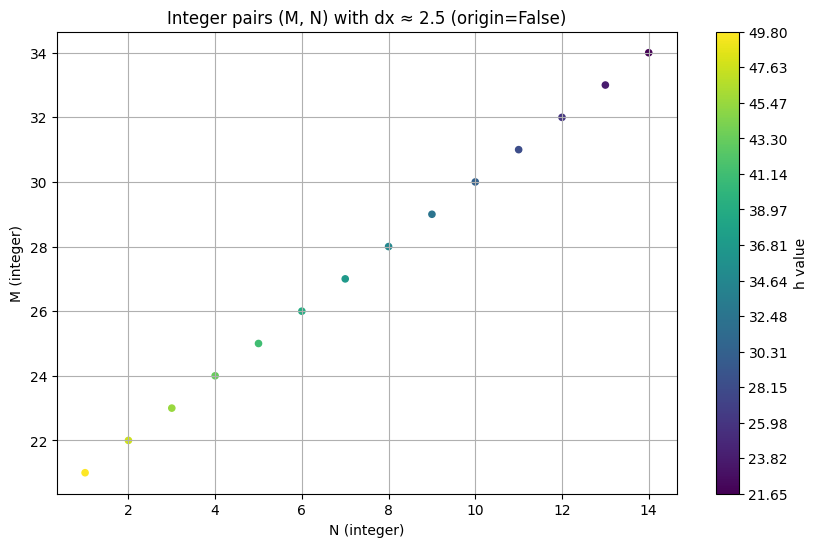

In [34]:
# Parameters
dx_target = 2.5
origin = False
valid_points = print_pairs(dx_target, origin=origin)


N_vals, M_vals, h_vals, dx = zip(*valid_points)
h_unique = sorted(set(np.round(h_vals, 2)))  # unique rounded h values

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(N_vals, M_vals, c=h_vals, cmap="viridis", s=20)
cbar = plt.colorbar(scatter)
cbar.set_ticks(h_unique)
cbar.set_ticklabels([f"{v:.2f}" for v in h_unique])
cbar.set_label("h value")
plt.xlabel("N (integer)")
plt.ylabel("M (integer)")
plt.title(f"Integer pairs (M, N) with dx ≈ {dx_target} (origin={origin})")
plt.grid(True)

plt.show()

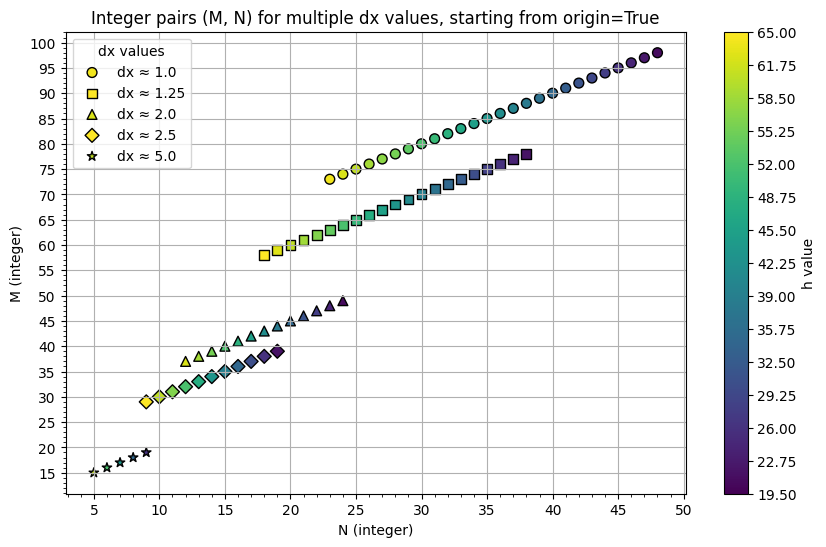

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


# Define dx scan range and step
dx_start = 0.7
dx_end = 6
dx_step = 0.05
tolerance = 1e-3
h_min = 19.5
h_max = 65
origin = True
# Find pairs
dx_candidates = np.arange(dx_start, dx_end + dx_step, dx_step)
dx_candidates = np.round(dx_candidates, 2)

valid_dx_list = []
dx_values = []
for dx in dx_candidates:
    points = find_pairs_for_dx(
        dx, tol=tolerance, h_min=h_min, h_max=h_max, origin=origin
    )
    if points:
        dx_values.append(dx)


fig, ax = plt.subplots(figsize=(10, 6))

markers = ["o", "s", "^", "D", "*", "p", "h"]  # Add more if needed
colors = plt.cm.tab10.colors  # 10 distinct colors
all_h = []
scatter_plots = []  # to store scatter objects for colorbar reference
for dx_target, marker, color in zip(dx_values, markers, colors):
    valid_points = find_pairs_for_dx(
        dx_target, tol=tolerance, h_min=h_min, h_max=h_max, origin=origin
    )
    if valid_points:
        N_vals, M_vals, h_vals, dx = zip(*valid_points)
        all_h.extend(h_vals)
        sc = ax.scatter(
            N_vals,
            M_vals,
            c=h_vals,
            cmap="viridis",
            marker=marker,
            label=f"dx ≈ {dx_target}",
            edgecolors="k",
            s=50,
            vmin=h_min,  # <-- sets color scale minimum
            vmax=h_max,  # <-- sets color scale maximum
        )
        scatter_plots.append(sc)
    else:
        print(f"No valid points found for dx = {dx_target}")
h_unique = sorted(set(np.round(all_h, 0)))  # unique rounded h values

ax.set_xlabel("N (integer)")
ax.set_ylabel("M (integer)")
ax.set_title(
    f"Integer pairs (M, N) for multiple dx values, starting from origin={origin}"
)
ax.grid(True)
ax.legend(title="dx values")

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.minorticks_on()
# Add colorbar linked to the last scatter plot
cbar = plt.colorbar(scatter_plots[-1], ax=ax)
h_ticks = np.linspace(h_min, h_max, num=15)  # 10 ticks for colorbar
# cbar.set_ticks(h_unique)
# cbar.set_ticklabels([f"{v:.0f}" for v in h_unique])
cbar.set_ticks(h_ticks)
cbar.set_ticklabels([f"{v:.2f}" for v in h_ticks])
cbar.set_label("h value")

plt.show()

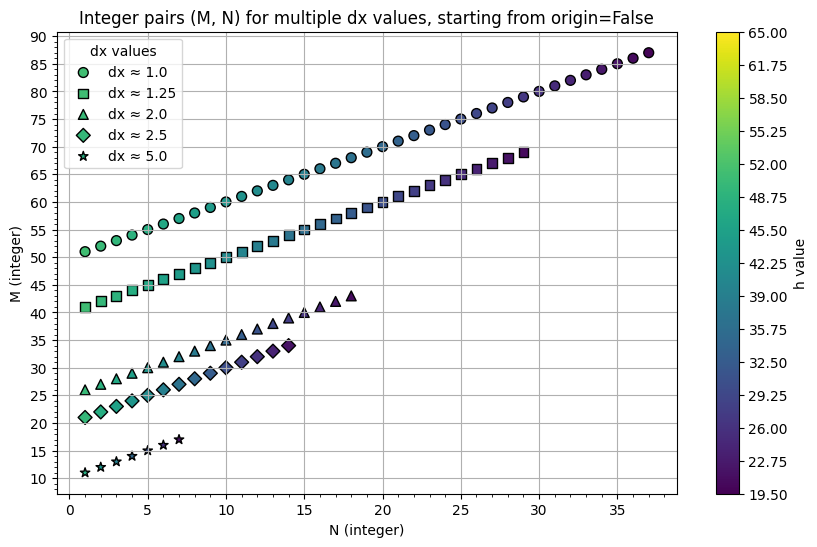

In [ ]:
dx_start = 0.7
dx_end = 6
dx_step = 0.05
tolerance = 1e-3
h_min = 19.5
h_max = 65
origin = False
# Find pairs
dx_candidates = np.arange(dx_start, dx_end + dx_step, dx_step)
dx_candidates = np.round(dx_candidates, 2)

valid_dx_list = []
dx_values = []
for dx in dx_candidates:
    points = find_pairs_for_dx(
        dx, tol=tolerance, h_min=h_min, h_max=h_max, origin=origin
    )
    if points:
        dx_values.append(dx)


fig, ax = plt.subplots(figsize=(10, 6))

markers = ["o", "s", "^", "D", "*", "p", "h"]  # Add more if needed
colors = plt.cm.tab10.colors  # 10 distinct colors
all_h = []
scatter_plots = []  # to store scatter objects for colorbar reference
for dx_target, marker, color in zip(dx_values, markers, colors):
    valid_points = find_pairs_for_dx(
        dx_target, tol=tolerance, h_min=h_min, h_max=h_max, origin=origin
    )
    if valid_points:
        N_vals, M_vals, h_vals, dx = zip(*valid_points)
        all_h.extend(h_vals)
        sc = ax.scatter(
            N_vals,
            M_vals,
            c=h_vals,
            cmap="viridis",
            marker=marker,
            label=f"dx ≈ {dx_target}",
            edgecolors="k",
            s=50,
            vmin=h_min,
            vmax=h_max,
        )
        scatter_plots.append(sc)
    else:
        print(f"No valid points found for dx = {dx_target}")
# h_unique = sorted(set(np.round(all_h, 0)))  # unique rounded h values

ax.set_xlabel("N (integer)")
ax.set_ylabel("M (integer)")
ax.set_title(
    f"Integer pairs (M, N) for multiple dx values, starting from origin={origin}"
)
ax.grid(True)
ax.legend(title="dx values")

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.minorticks_on()
# Add colorbar linked to the last scatter plot
cbar = plt.colorbar(scatter_plots[-1], ax=ax)
h_ticks = np.linspace(h_min, h_max, num=15)  # 10 ticks for colorbar
# cbar.set_ticks(h_unique)
# cbar.set_ticklabels([f"{v:.0f}" for v in h_unique])
cbar.set_ticks(h_ticks)
cbar.set_ticklabels([f"{v:.2f}" for v in h_ticks])
cbar.set_label("h value")

plt.show()

In [38]:
def calc_covered_corners(dx, h, N, M, origin=True):
    """
    Calculate the covered corners area for a given dx, h, N, M.
    """
    fov = 60
    W = 2 * h * np.tan(np.deg2rad(fov / 2))

    if origin:
        x_init = 0
        y_init = 0
    else:
        x_init = W / 2
        y_init = W / 2

    # x_final = N  * dx + W
    # y_final = M  * dx + W

    # if origin:
    x_dist = x_init + dx * N
    y_dist = y_init + dx * M
    # else:
    #     x_dist = x_init + dx * (N - 1)
    #     y_dist = y_init + dx * (M - 1)

    print(f"x_dist: {x_dist}, y_dist: {y_dist}")

    # covered_area = (x_final - x_init) * (y_final - y_init)
    # return covered_area


def calc_uncovered_border(dx, origin=True):
    """
    Calculate the uncovered border area for a given dx, h, N, M.
    """
    fov = 60

    valid_points = find_pairs_for_dx(dx, origin=origin)
    if valid_points:
        N_vals, M_vals, h_vals, dx = zip(*valid_points)
    else:
        print("No valid points found for the given dx.")
        return None
    for N, M, h in zip(N_vals, M_vals, h_vals):
        print(f"N: {N}, M: {M}, h: {h}")
        calc_covered_corners(dx, h, N, M, origin=True)


calc_uncovered_border(dx, origin=False)

TypeError: unsupported operand type(s) for -: 'float' and 'tuple'